In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.fillna('', inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


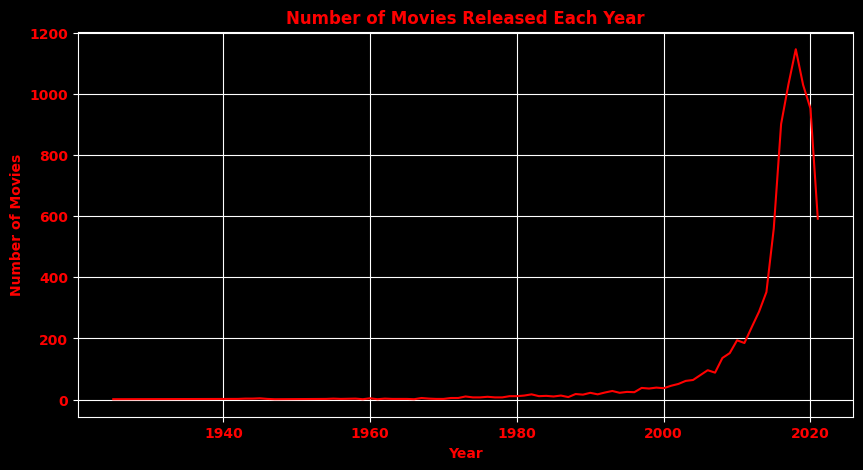

In [ ]:
release_year_counts = df['release_year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('black')  # Background color of the figure
ax.set_facecolor('black')  # Background color of the axes
plt.plot(release_year_counts.index, release_year_counts.values, color='red')
plt.title('Number of Movies Released Each Year', color='red', weight='bold')
plt.xlabel('Year', color='red', weight='bold')
plt.xticks(color='red', weight='bold')
plt.ylabel('Number of Movies', color='red', weight='bold')
plt.yticks(color='red', weight='bold')
plt.grid(True, color='white')
plt.show()

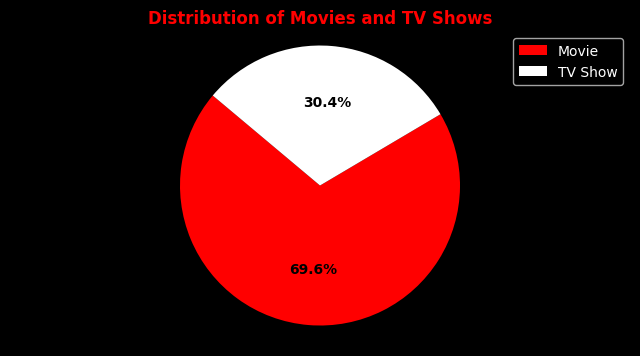

In [ ]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 4), facecolor='black')
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'white'],
        textprops={'color': 'black', 'weight': 'bold'})
plt.title('Distribution of Movies and TV Shows', color='red', weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), labelcolor='white')
plt.axis('equal')
plt.show()

In [ ]:
pip install squarify

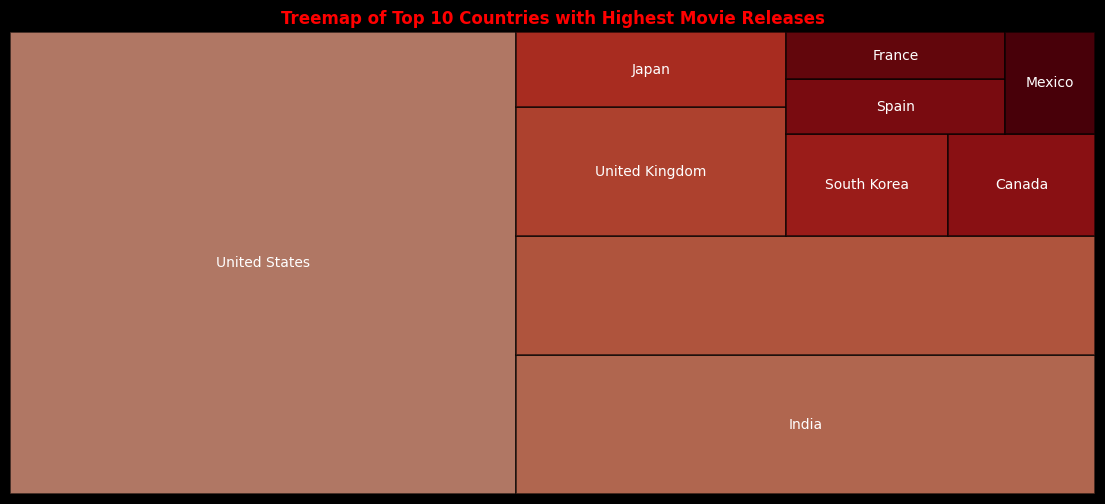

In [ ]:
import squarify
import matplotlib.colors as mcolors

# Count the number of releases per country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'num_releases']

# Get the top 10 countries by the number of releases
top_10_countries = country_counts.head(10)

# Generate color shades from bright to dark red
num_colors = top_10_countries.shape[0]
colors = plt.cm.Reds(np.linspace(0.3, 1, num_colors))  # Adjust the range for brighter to darker reds

plt.figure(figsize=(14, 6))
plt.style.use('dark_background')
squarify.plot(sizes=top_10_countries['num_releases'], label=top_10_countries['country'], color=colors, alpha=0.7, linewidth=1.2, edgecolor='black')
plt.title('Treemap of Top 10 Countries with Highest Movie Releases', color='red', weight='bold')
plt.axis('off')
plt.show()

In [ ]:
selected_features = ['title', 'director', 'cast', 'listed_in', 'description']
df['combined_features'] = df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
def recommend_similar_titles(title, cosine_sim=cosine_sim, df=df, n=5):
    # Get the index of the movie/TV show that matches the title
    idx = df[df['title'].str.lower() == title.lower()].index[0]

    # Get pairwise similarity scores with all movies/TV shows
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort movies/TV shows based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get scores of the n most similar movies/TV shows
    sim_scores = sim_scores[1:(2 * n + 1)]  # Exclude the first item (itself)

    # Get movie/TV show indices
    movie_indices = [i[0] for i in sim_scores]

    # Separate movies and TV shows
    similar_movies = df[(df.index.isin(movie_indices)) & (df['type'] == 'Movie')]['title'].head(n)
    similar_tv_shows = df[(df.index.isin(movie_indices)) & (df['type'] == 'TV Show')]['title'].head(n)

    print(f"Similar Movie(s) list for '{title}':")
    for i, movie in enumerate(similar_movies, 1):
        print(f"{i}. {movie}")

    print(f"\nSimilar TV_show(s) list for '{title}':")
    for i, tv_show in enumerate(similar_tv_shows, 1):
        print(f"{i}. {tv_show}")

In [ ]:
title = 'New Girl'
recommend_similar_titles(title)

Similar Movie(s) list for 'New Girl':
1. Dick Johnson Is Dead
2. Rock the Kasbah
3. Yes Man
4. Love, Guaranteed
5. Desperados

Similar TV_show(s) list for 'New Girl':
1. Two Fathers
2. Happy Endings
3. The Bachelor
